Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Importing Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

Dataset to Pandas Dataframe

In [4]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Add target column to dataFrame

In [6]:
house_price_dataframe.loc[:, 'Price'] = house_price_dataset.target

In [7]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
house_price_dataframe.shape

(20640, 9)

Check missing values

In [9]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Statistical measures

In [10]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding correlation

In [11]:
correlation = house_price_dataframe.corr()

Heatmap for Correlation

<Axes: >

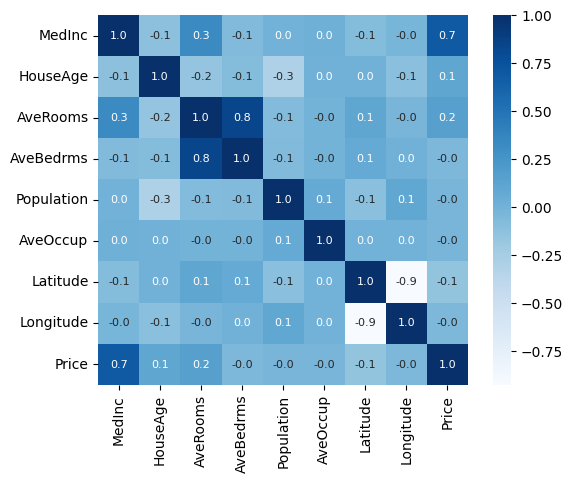

In [12]:
plt.Figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting data and target

In [13]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [14]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting data to train and test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
Y_test.shape

(4128,)

Model Training
XGBoost Regressor

In [17]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor())])

Training Model

In [18]:
model_pipeline.fit(X_train, Y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [19]:
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor(random_state=2))])

param_grid = {'regressor__n_estimators': [100, 200, 500], 'regressor__learning_rate': [0.05, 0.1, 0.2], 'regressor__max_depth': [3, 5, 7]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# 4. Run the search
print("Starting Grid Search... (this may take a few minutes)")
grid_search.fit(X_train, Y_train)

# 5. Print the best parameters found
print("\nBest parameters found:")
print(grid_search.best_params_)

# 6. Use the best model for all future predictions
best_model = grid_search.best_estimator_

Starting Grid Search... (this may take a few minutes)
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__n_estimators=200; total t

Evaluation

Prediction on Training Data

In [20]:
training_data_prediction = best_model.predict(X_train)

testing_data_prediction = best_model.predict(X_test)

Get feature importances from the 'regressor' step of the pipeline

In [21]:
importances = best_model.named_steps['regressor'].feature_importances_

Get feature names

In [22]:
feature_names = X.columns

Create a pandas DataFrame

In [23]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

Plot

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:1292: FutureW

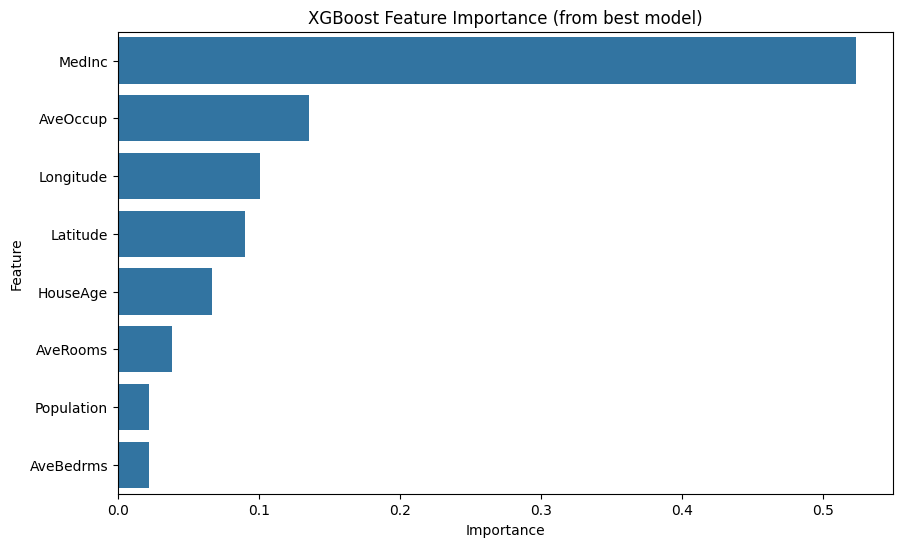

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance (from best model)')
plt.show()

Pipelines for all of them for fair, scaled comparison

In [25]:
pipeline_lr = Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())])

pipeline_rf = Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(n_estimators=100, random_state=2))])

We can use the 'best_model' we already found with GridSearchCV

Or, for a quicker comparison, just use the default XGBoost in a pipeline

In [26]:
pipeline_xgb_default = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor(random_state=2))])

List of models to loop through

In [27]:
models = {
    "Linear Regression": pipeline_lr, "Random Forest": pipeline_rf, "XGBoost (Default)": pipeline_xgb_default, "XGBoost (Tuned)": best_model  # The one from GridSearchCV
}

results = []

In [28]:
for name, model in models.items():
    print(f"Training {name}...")
    # We re-fit the tuned model just to be consistent, though it's already trained
    if name == "XGBoost (Tuned)":
        # GridSearchCV models are already fitted, just get scores
        y_test_pred = model.predict(X_test)
    else:
        model.fit(X_train, Y_train)
        y_test_pred = model.predict(X_test)
    
    # Calculate scores
    r2 = r2_score(Y_test, y_test_pred)
    mae = mean_absolute_error(Y_test, y_test_pred)
    
    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae})
    print(f"{name} - R2: {r2:.4f}, MAE: {mae:.4f}\n")

Training Linear Regression...
Linear Regression - R2: 0.6014, MAE: 0.5358

Training Random Forest...
Random Forest - R2: 0.8083, MAE: 0.3303

Training XGBoost (Default)...
XGBoost (Default) - R2: 0.8338, MAE: 0.3109

Training XGBoost (Tuned)...
XGBoost (Tuned) - R2: 0.8477, MAE: 0.2951



Display final results in a clean table

In [29]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("--- Model Comparison ---")
print(results_df.to_markdown(index=False))

--- Model Comparison ---
| Model             |   R2 Score |      MAE |
|:------------------|-----------:|---------:|
| XGBoost (Tuned)   |   0.847729 | 0.295067 |
| XGBoost (Default) |   0.8338   | 0.310863 |
| Random Forest     |   0.80827  | 0.330307 |
| Linear Regression |   0.601385 | 0.535829 |


To Predict

In [38]:
# --- 1. Fill in your house details here ---
new_house_data = {
    'MedInc': [3.5],       # Example: 3.5
    'HouseAge': [15],        # Example: 15
    'AveRooms': [5.0],       # Example: 5.0
    'AveBedrms': [1.1],      # Example: 1.1
    'Population': [800],     # Example: 800
    'AveOccup': [2.5],       # Example: 2.5
    'Latitude': [34.0],      # Example: 34.0
    'Longitude': [-118.0]    # Example: -118.0
}

In [39]:
feature_order = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                 'AveOccup', 'Latitude', 'Longitude']
                 
# Create the DataFrame, ensuring the column order is correct
single_house_df = pd.DataFrame(new_house_data, columns=feature_order)

# 'best_model' is the variable we created during GridSearchCV
predicted_price_raw = best_model.predict(single_house_df)

# The output is an array, so get the first (and only) item
predicted_price = predicted_price_raw[0]

# Remember the target variable was in $100,000s
final_price = predicted_price * 100000

print(f"--- House Price Prediction ---")
print(f"Predicted value (in $100,000s): ${predicted_price:.2f}")
print(f"Predicted price: ${final_price:,.2f}")

--- House Price Prediction ---
Predicted value (in $100,000s): $1.92
Predicted price: $192,270.69
